In [1]:
%run Steppers.ipynb #Import stepper functions (Euler, RK4, etc)
%run ODEs.ipynb     #Import ODEs (Pendulum etc)
%run Tools.ipynb
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
def Brusselator(f,t,a,b):
    x,y=f
    dxdt=1-(1+b)*x+a*x**2*y
    dydt=b*x-a*x**2*y
    return(np.array([dxdt,dydt]))

In [3]:
def XNullclines(x,a,b):
    y=((1+b)*x - 1)/(a*x**2)
    return(y)

def YNullclines(x,a,b):
    y=b/(a*x)
    return(y)

def YNullclineZero(y,a,b):
    return(y*0)


<IPython.core.display.Javascript object>


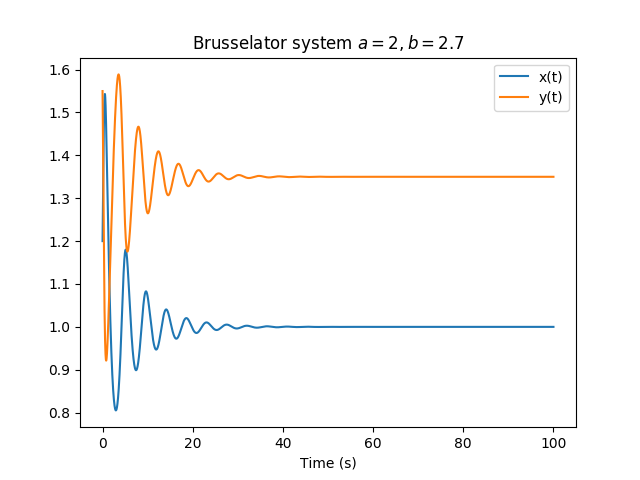

Fixed Points:
[(0.99699699699699695, 1.3525557047466978), (1.0, 1.3500000000000001)]


/home/adam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/adam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


<IPython.core.display.Javascript object>


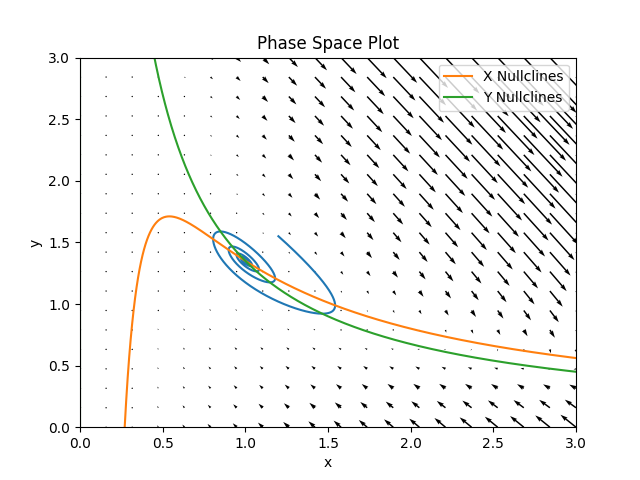

In [4]:
t0 = 0
tf = 100
h  = 0.001
t  = np.arange(t0,tf,h)  #Generate timesteps

a=2
b=2.7
x0=1+0.2
y0=b/a+0.2

f0=(x0,y0)

xLims=(0,3)
yLims=(0,3)

sol=RK4(Brusselator, f0, t,args=(a,b))
x,y=np.hsplit(sol,len(sol[0]))

plt.title(r"Brusselator system $a={}, b={}$".format(a,b))
plt.plot(t,x,label="x(t)")
plt.plot(t,y,label="y(t)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

for f0 in [(x0,y0)]:
    sol=RK4(Brusselator, f0, t,args=(a,b))
    x,y=np.hsplit(sol,len(sol[0]))

    plt.plot(x,y, color="C0")
    
x=np.linspace(xLims[0],xLims[1],1000)

y1=XNullclines(x,a,b)
y2=YNullclines(x,a,b)

y3=np.linspace(-5,5,100)
x3=YNullclineZero(y3,a,b)

y1[np.abs(y1)>100]*=np.inf
y2[np.abs(y2)>100]*=np.inf

intersections=IntersectionIndices(y1,y2)
fixedPoints=[]
print("Fixed Points:")
for index in intersections:
    if(y1[index]!=np.inf and y1[index]!=-np.inf):
        fixedPoints.append((x[index],y1[index]))
print(fixedPoints)
plt.plot(x,y1,label="X Nullclines",color="C1")
plt.plot(x,y2,label="Y Nullclines",color="C2")
plt.plot(x3,y3,color="C2")
plt.xlim(xLims)
plt.ylim(yLims)

PlotQuiver(Brusselator,xLims,yLims, args=(a,b))

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.title("Phase Space Plot")
plt.show()

<IPython.core.display.Javascript object>


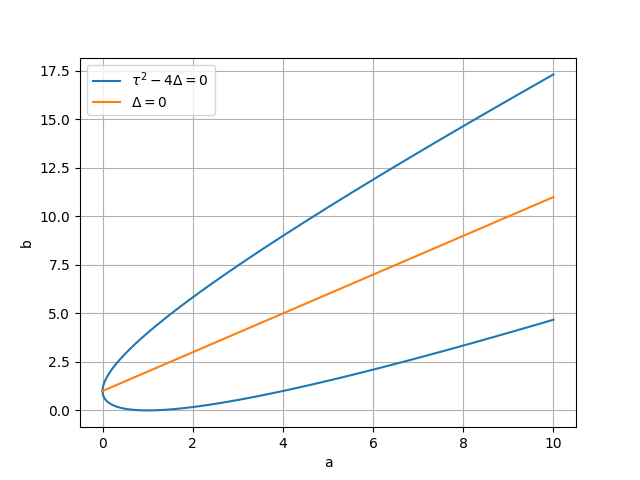

In [5]:
def UpperCurve(a):
    b=a+1+np.sqrt(4*a)
    return(b)

def LowerCurve(a):
    b=a+1-np.sqrt(4*a)
    return(b)
    
def TraceZero(a):
    return(a+1)

a = np.linspace(0,10,10000)
bUpper=UpperCurve(a)
bLower=LowerCurve(a)
trace=TraceZero(a)

plt.plot(a,bUpper,color="C0", label=r"$\tau^2 - 4\Delta=0$")
plt.plot(a,bLower,color="C0")
plt.plot(a,trace, color="C1", label=r"$\Delta=0$")
plt.xlabel("a")
plt.ylabel("b")
plt.grid()
plt.legend()
plt.show()